In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

plt.rcParams['figure.figsize'] = (20, 15)


import warnings
warnings.filterwarnings("ignore")


In [156]:
df = pd.read_csv("data/telco_basic_clean.csv", index_col=[0])
df.drop("customerid", axis=1, inplace=True)



---

# Feature Engeneering

---

In [157]:
# Makes bins out of the tenure in chunks of one year

# Drop the customer Id or change it to the index because they are randomly generated

# change the Senior Citizen to yes and no

In [158]:
df.churn = np.where(df.churn == "Yes", 1,0)

In [159]:
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [160]:
# make tenure into groups of one year 

# labels = ["{0}, -{1}".format(i, i +11) for i in range(1, 72,12)]
# df["tenure_groups"] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [161]:
tenure_group = []

for t in df.tenure:
    if t <= 12:
        tenure_group.append("1")
    elif t <= 24:
        tenure_group.append("2")
    elif t <= 36:
        tenure_group.append("3")
    elif t <= 48:
        tenure_group.append("4")
    elif t <= 60:
        tenure_group.append("5")
    else:
        tenure_group.append("6")
df["tenure_group"] = tenure_group

In [162]:
col = df.pop("churn")

In [163]:
df.insert(0, "churn", col)

In [164]:
df

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,tenure_group
0,0,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,0,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,3
2,1,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,4
4,1,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,2
7039,0,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,6
7040,0,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,1
7041,1,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [165]:
df = pd.get_dummies(df, drop_first=True)

In [166]:
corr["churn"].sort_values(ascending=False)

churn                                    1.000000
internetservice_Fiber optic              0.308020
paymentmethod_Electronic check           0.301919
monthlycharges                           0.193356
paperlessbilling_Yes                     0.191825
seniorcitizen_yes                        0.150889
streamingtv_Yes                          0.063228
streamingmovies_Yes                      0.061382
multiplelines_Yes                        0.040102
tenure_group_2                           0.020308
phoneservice_Yes                         0.011942
gender_Male                             -0.008612
multiplelines_No phone service          -0.011942
tenure_group_3                          -0.040637
tenure_group_4                          -0.059229
deviceprotection_Yes                    -0.066160
onlinebackup_Yes                        -0.082255
paymentmethod_Mailed check              -0.091683
tenure_group_5                          -0.100416
paymentmethod_Credit card (automatic)   -0.134302


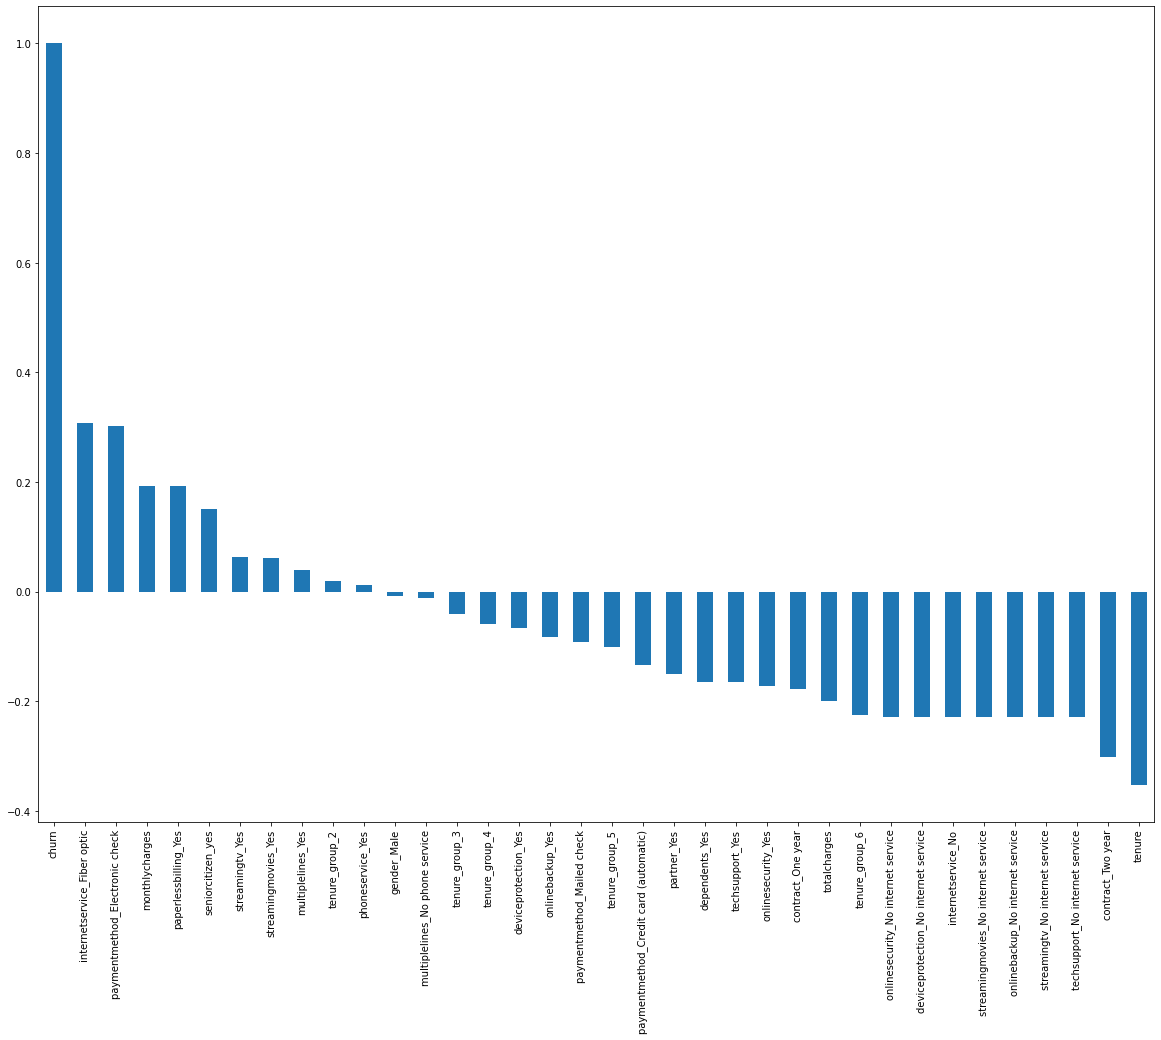

In [167]:
corr["churn"].sort_values(ascending=False).plot(kind="bar");

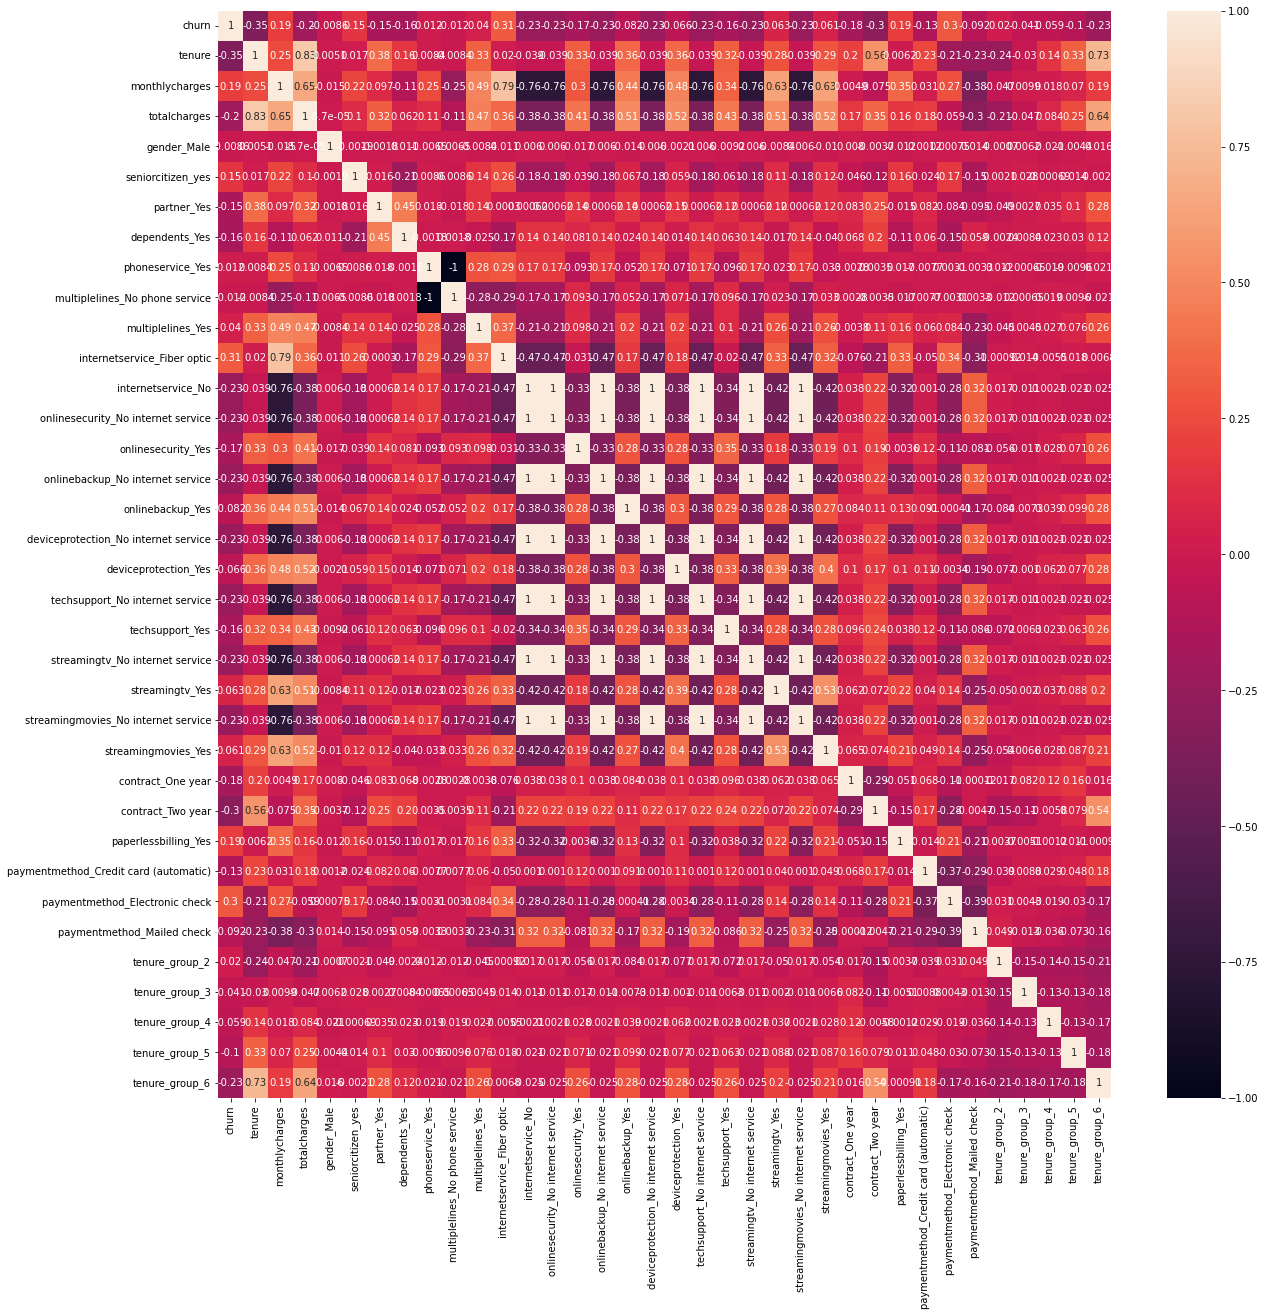

In [168]:
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True);


In [169]:
corr["churn"].sort_values(ascending=False).head(7)

churn                             1.000000
internetservice_Fiber optic       0.308020
paymentmethod_Electronic check    0.301919
monthlycharges                    0.193356
paperlessbilling_Yes              0.191825
seniorcitizen_yes                 0.150889
streamingtv_Yes                   0.063228
Name: churn, dtype: float64

In [170]:
corr["churn"].sort_values(ascending=False).tail(7)

internetservice_No                    -0.227890
streamingmovies_No internet service   -0.227890
onlinebackup_No internet service      -0.227890
streamingtv_No internet service       -0.227890
techsupport_No internet service       -0.227890
contract_Two year                     -0.302253
tenure                                -0.352229
Name: churn, dtype: float64

## conclusions

Clients with:
- Fiber optic internet service
- Electonic check payment
- monthly payers
- paperless billing
- senior citizens

are more likely to churn

and clients with:

- with no internet services

are less likely to churn


In [171]:
df.to_csv("data/telco_basic_fe.csv")